In [22]:
import pickle
import re
import numpy as np

basis_file = '/home/anton/Documents/Tulane/Research/PNC_Good/AngleBasis1.pkl'
demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/PNC/'

basis = pickle.load(open(basis_file, 'rb'))

pnc_thetas = []
pnc_jitter = []
pnc_sex = []
pnc_race = []
pnc_fc = []

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))
pnc_subs = []
pnc_tasks = []

for subtask in basis:
    m = re.search('([^-]+)-(.*)', subtask)
    sub = m.group(1)
    task = m.group(2)
    s = demo['Sex'][sub] == 'M'
    r = demo['Race'][sub]
    if r not in ['AA', 'EA']:
        continue
    pnc_subs.append(sub)
    pnc_tasks.append(task)
    pnc_sex.append(s)
    pnc_race.append(r == 'AA')
    pnc_thetas.append(basis[subtask]['thetas'])
    pnc_jitter.append(basis[subtask]['jitter'])
    p = np.load(f'{demodir}/fc/{sub}_task-{task}_fc.npy')
    pnc_fc.append(p)
    
pnc_thetas = np.stack(pnc_thetas)
pnc_jitter = np.stack(pnc_jitter)
pnc_sex = np.array(pnc_sex).astype('int')
pnc_race = np.array(pnc_race).astype('int')
pnc_fc = np.stack(pnc_fc)

print([a.shape for a in [pnc_thetas, pnc_jitter, pnc_sex, pnc_race, pnc_fc]])

[(3849, 1, 264), (3849, 1, 264), (3849,), (3849,), (3849, 34716)]


In [23]:
import pickle
import re
import numpy as np

basis_file = '/home/anton/Documents/Tulane/Research/BSNIP/AngleBasis1.pkl'
demodir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/BSNIP/'

basis = pickle.load(open(basis_file, 'rb'))

bsnip_thetas = []
bsnip_jitter = []
bsnip_fc = []
bsnip_race = []
bsnip_sex = []

demo = pickle.load(open(f'{demodir}/demographics.pkl', 'rb'))
bsnip_subs = []

for subtask in basis:
    m = re.search('([^-]+)', subtask)
    sub = m.group(1)
    s = demo['sex'][sub] == 's1.0' # Male
    r = demo['Race'][sub]
    if r not in ['AA', 'CA']:
        continue
    bsnip_sex.append(s)
    bsnip_race.append(r == 'AA')
    bsnip_subs.append(sub)
    bsnip_thetas.append(basis[subtask]['thetas'])
    bsnip_jitter.append(basis[subtask]['jitter'])
    p = np.load(f'{demodir}/fc/{sub}_task-unk_fc.npy')
    bsnip_fc.append(p)
    
bsnip_thetas = np.stack(bsnip_thetas)
bsnip_jitter = np.stack(bsnip_jitter)
bsnip_fc = np.stack(bsnip_fc)
bsnip_sex = np.array(bsnip_sex).astype('int')
bsnip_race = np.array(bsnip_race).astype('int')

print([a.shape for a in [bsnip_thetas, bsnip_jitter, bsnip_fc, bsnip_sex, bsnip_race]])

[(1165, 1, 264), (1165, 1, 264), (1165, 34716), (1165,), (1165,)]


In [10]:
def rmse(yhat, y):
    if isinstance(yhat, np.ndarray) or isinstance(yhat, int):
        f = np.mean
    else:
        f = torch.mean
    return f((y-yhat)**2)**0.5

def tops(thetas, jitter):
    t0 = np.expand_dims(thetas, 2)
    t1 = np.expand_dims(thetas, 3)
    j0 = np.expand_dims(jitter, 2)
    j1 = np.expand_dims(jitter, 3)
    ps = np.cos(t0-t1)*(j0*j1)
    a,b = np.triu_indices(264, 1)
    ps = ps[:,:,a,b]
    return ps

print('Complete')

Complete


In [12]:
# AB5

ps = tops(pnc_thetas, pnc_jitter)
pnc_ab5 = np.mean(ps, axis=1)
pnc_res5 = pnc_fc - pnc_ab5

print(pnc_ab5.shape)
print(pnc_res5.shape)

ps = tops(bsnip_thetas, bsnip_jitter)
bsnip_ab5 = np.mean(ps, axis=1)
bsnip_res5 = bsnip_fc - bsnip_ab5

print(bsnip_ab5.shape)
print(bsnip_res5.shape)

(3849, 34716)
(3849, 34716)
(1165, 34716)
(1165, 34716)


In [24]:
# AB1

ps = tops(pnc_thetas, pnc_jitter)
pnc_ab1 = np.mean(ps, axis=1)
pnc_res1 = pnc_fc - pnc_ab1

print(pnc_ab1.shape)
print(pnc_res1.shape)

ps = tops(bsnip_thetas, bsnip_jitter)
bsnip_ab1 = np.mean(ps, axis=1)
bsnip_res1 = bsnip_fc - bsnip_ab1

print(bsnip_ab1.shape)
print(bsnip_res1.shape)

(3849, 34716)
(3849, 34716)
(1165, 34716)
(1165, 34716)


In [13]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


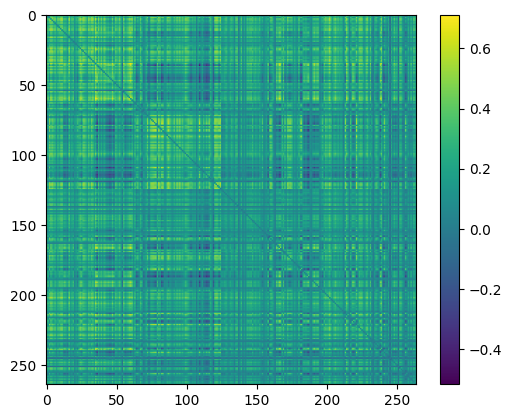

In [31]:
import matplotlib.pyplot as plt

plt.imshow(remap(vec2mat(pnc_ab1[0])))
plt.colorbar()
plt.show()

In [32]:
import sys

pth = '../../LatentSimilarity/'

if pth not in sys.path:
    sys.path.append(pth)
    
print(sys.path)

['/home/anton/Documents/Tulane/Research/code/LowRank', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/anton/.local/lib/python3.10/site-packages', '/usr/lib/python3.10/site-packages', '../../LatentSimilarity/']


In [66]:
from sklearn.linear_model import LogisticRegression
from latsim import LatSimClf
from sklearn.metrics import roc_auc_score
# import warnings
# warnings.filterwarnings("ignore")

def cat(x, **kwargs):
    return np.concatenate(x, **kwargs)

auc_fc = []
auc_ens = []

for i in range(20):

    idcs = np.random.permutation(bsnip_fc.shape[0])[:1200]
    x0 = bsnip_ab5[idcs]#[:500]#[idcs[:1244]]
    x1 = bsnip_res1[idcs]#[:500]#[idcs[:1244]]
    x2 = bsnip_fc[idcs]#fc#[:500]#[idcs[:1244]]
    x3 = pnc_ab5
    x4 = pnc_res1
    x5 = pnc_fc
    y0 = bsnip_sex[idcs]#[:500]#[idcs[:1244]]
    y1 = pnc_sex
    
    n = 34716
    
#     reg0 = LogisticRegression(C=1, max_iter=1000).fit(x0, y0) 
#     reg1 = LogisticRegression(C=1, max_iter=1000).fit(x1, y0) 
    reg0 = LatSimClf(nepochs=500).fit(x0, y0)
    reg1 = LatSimClf(nepochs=500).fit(x1, y0)
    p0 = reg0.predict_proba(x3)
    p1 = reg1.predict_proba(x4)
    yhat = np.argmax(p0+p1, axis=1)
    auc = roc_auc_score(y1, (p0+p1)[:,1])
    auc_ens.append(auc)
    print(auc)
#     print(np.mean(yhat == y1))
    reg2 = LatSimClf(nepochs=500).fit(x2, y0)
    yhat = reg2.predict(x5)
    p2 = reg2.predict_proba(x5)
    auc = roc_auc_score(y1, p2[:,1])
    auc_fc.append(auc)
    print(auc)
#     print(np.mean(yhat == y1))

print('----')
print(np.mean(auc_ens), np.std(auc_ens))
print(np.mean(auc_fc), np.std(auc_fc))

0.7018921329355785
0.6594662963482407
0.7147068905111228
0.6946842717735808
0.6846068308912281
0.6619474803419507
0.6918048095547785
0.6662171258012269
0.6740504272759124
0.6804101534684321
0.6792674388192121
0.6475503046246303
0.7129708198249958
0.6681137532429486
0.7113366877872356
0.6739138321946349
0.6911298213731638
0.6902590784962791
0.7036319941690552
0.6796198243460359
0.6974175271660406
0.6394838844879431
0.7035174654884202
0.6447482778731131
0.6987928189704982
0.6694477551566336
0.706620163870777
0.645617531606396
0.6878859251020334
0.6714155907378516
0.7095876209387669
0.6642385954614152
0.6795867924334176
0.6910583424802852
0.6958196760814837
0.6405821955824961
0.6863771518801928
0.6673297868250321
0.7206783563536884
0.6853886312820876
----
0.69758406757138 0.012746473957401127
0.6670746356065607 0.016604470601083533
